The purpose of this notebook is to plot the observable radiation from an electron emitting synchrotron radiation confined to a region by a magnetic field. This is problem 6.3 in Radiative Processes in Astrophysics (Rybicki). The following picture shows the confinment of the electron by a magnetic field between points 1 and 2. The electron will reflect back and forth between these two points as if they are "magnetic mirrors" while emitting radiation.

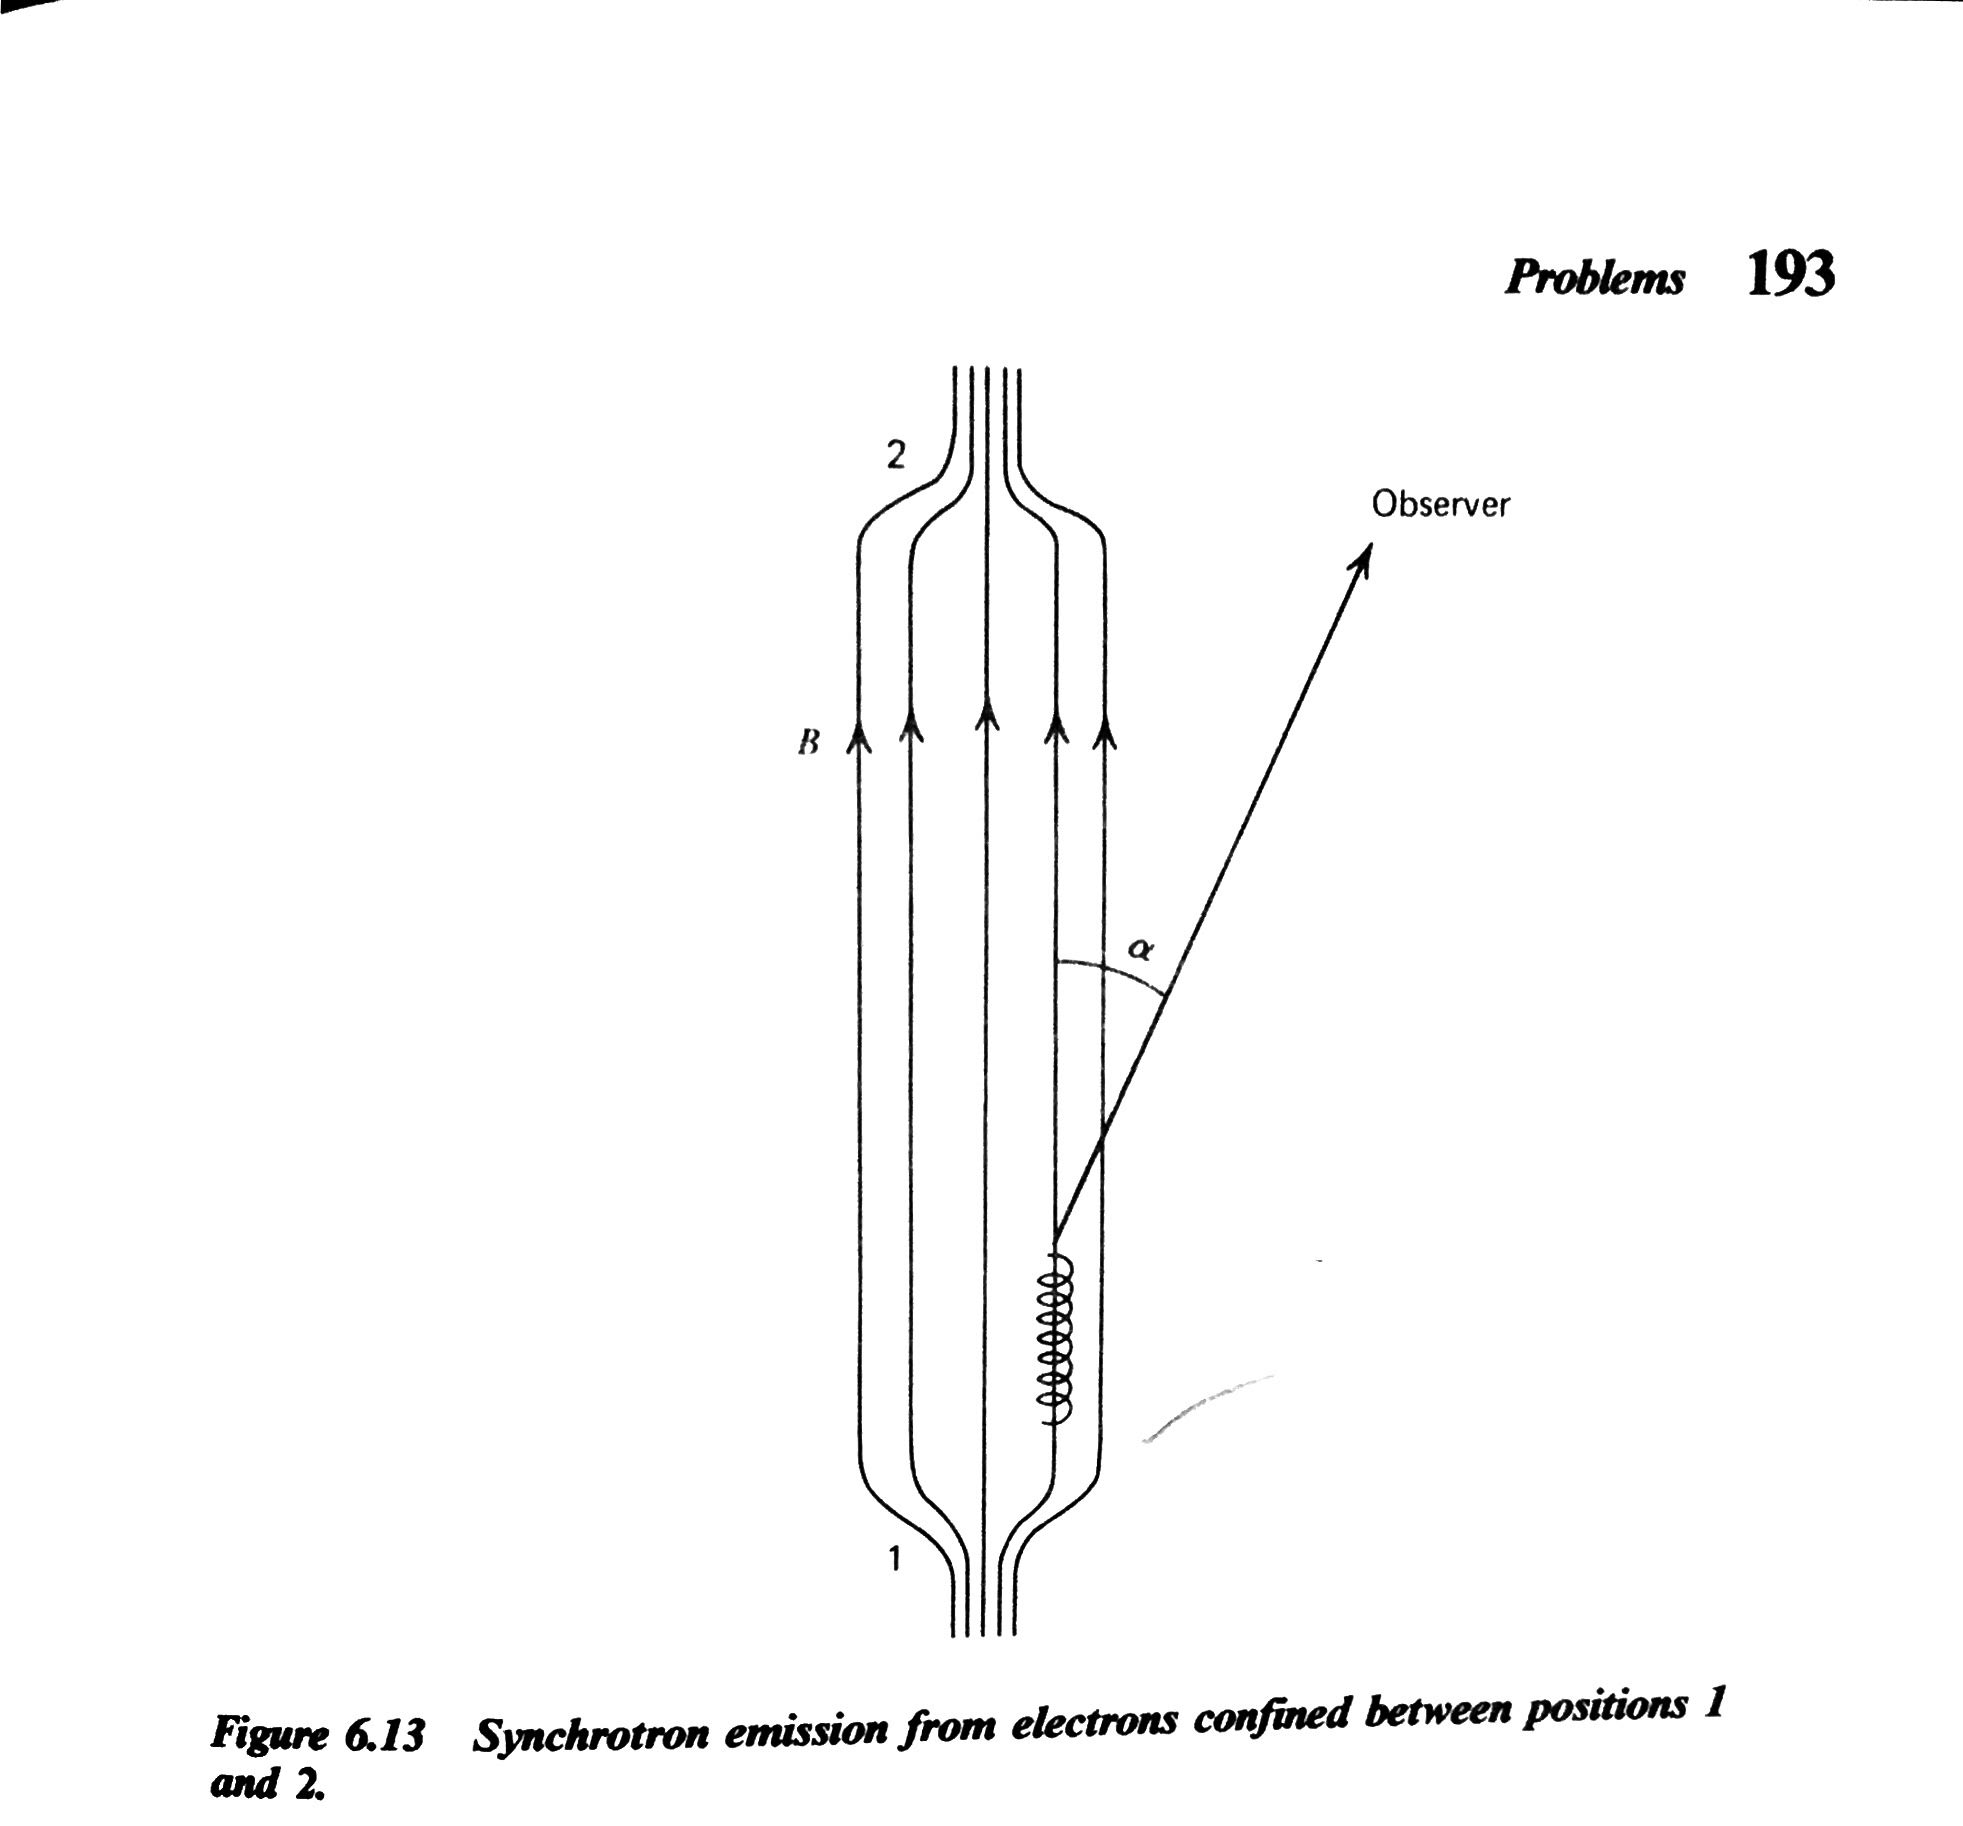


First we import the needed files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

Next, we define the function and constants. Here we need to calculate the arrival times of the pulses with respect to the time they were emitted. We do this by finding values for t(n-j) = T-j * tau(1-b * cos(alpha)^2.

We define our constants as follows:

N=number of loops between mirrors

beta=velocity of electron/c   
*Beta should be a value between 0<=b<=1.

alpha_d=pitch angle 
*Manipulating this constant shows how changing the angle to observer effects the arrival time of the pulses. This value should be between 0<=aplha_d<=90 and is in units of degrees.

In [2]:
N = 20
alpha_d = 10   # Pitch angle in degrees (should be 0 <= alpha_d <= 90)
beta = 0.5

Check the inputs.  Convert pitch angle to radians.

In [3]:
assert( alpha_d >= 0. and alpha_d <= 90.)
assert(beta > 0. and beta < 1.)

alpha = alpha_d * np.pi / 180.

Now, we find values for t(n-j), or our plots horizontal (x) axis.

In [4]:
x = np.zeros(2 * N + 1)
y = np.ones(2 * N + 1)

for i in range(N+1):
    x[i] = 1. - ((N - i) / N) * (1. - beta * np.power(np.cos(alpha),2 ))

for i in range(N+1, 2*N+1):
    x[i] = (i / N) * (1. - beta * np.power(np.cos(alpha), 2))
    if np.cos(alpha) > 1.e-15:
        y[i] = 0


Next, we can plot our emission arrival times using mathplotlib. By changing the values of alpha and beta, we can vary the distribution of emission times, corresponding to the beaming of radiation.

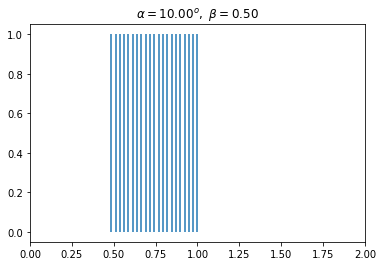

In [5]:
plt.stem(x, y, basefmt = 'None', markerfmt = 'None', use_line_collection=True)
plt.xlim([0,2])
plt.title('$\\alpha = $' + '{0:.2f}'.format(float(alpha_d)) + '$^o$' + \
           '$,\ \\beta = $' + '{0:.2f}'.format(beta))

plt.show()

Now, we will create an animation that will vary our value of alpha from 0 to 90 or beta from 0 to 1. First, we set a blank plot.

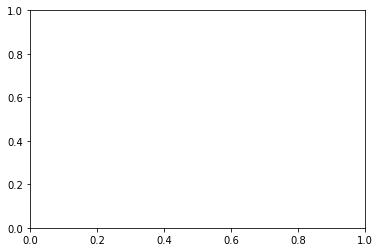

In [6]:
fig, ax = plt.subplots()
Nframes = 90

Now we set our function to be animated.

In [7]:
def updatefig(i, alp_d, beta):
    ax.clear()
    
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    
    x = np.zeros(2 * N + 1)
    y = np.ones(2 * N + 1)
    
    assert((alp_d is None and beta is not None) or (alp_d is not None and beta is None))   
    
    if alp_d is None:
        alpha_d = 90. * float(i) / float(Nframes - 1)
        
    else:
        alpha_d = alp_d
        beta = float(i) / float(Nframes - 1)
        
    alpha = alpha_d * np.pi / 180.

    for j in range(N+1):
        x[j] = 1. - ((N - j) / N) * (1. - beta * np.power(np.cos(alpha),2 ))

    for j in range(N+1, 2*N+1):
        x[j] = (j / N) * (1. - beta * np.power(np.cos(alpha), 2))
        if np.cos(alpha) > 1.e-15:
            y[j] = 0
                        
    ax.stem(x, y, use_line_collection=True, basefmt = 'None', markerfmt = 'None')
            
    ax.set_title('$\\alpha = $' + '{0:.2f}'.format(float(alpha_d)) + '$^o$' + \
                 '$,\ \\beta = $' + '{0:.2f}'.format(beta))

Now create the movie.  Choose either to vary the angle (between zero and 90 degrees) or the beta (between 0 and 1).  Set the variable you would like to vary to None.

In [8]:
alpha_d = None
beta = 0.8
args = (alpha_d, beta)

Create the movie.

In [9]:
anim = animation.FuncAnimation(fig, updatefig, frames=Nframes, fargs = args)

Run the movie.

In [10]:
HTML(anim.to_jshtml())